# Part 2: Finding Associations
In Part 1, we started looking at some trends in the data. There are fun associations that fans would likely find amusing or obvious. But there are also associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. In this section, we look at four dimensions that speak to important demographic categories: `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor`. It is important to note that, by categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions.

### Imports

In [2]:
# importing data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import random
from sklearn.preprocessing import StandardScaler
import pingouin as pg

### Reading the Data

In [3]:
# read processed data from part 1 notebook
char_score_data = pd.read_csv("data/processed/char_score_data.csv")
char_score_data.head()

,id,character,source,playful_serious,shy_bold,cheery_sorrowful,masculine_feminine,charming_awkward,lewd_tasteful,intellectual_physical,...,cringing-away_welcoming-experience,stereotypical_boundary-breaking,energetic_mellow,hopeful_fearful,likes-change_resists-change,manic_mild,old-fashioned_progressive,gross_hygienic,stable_unstable,overthinker_underthinker
0,HML/1,Prince Hamlet,Hamlet,62.4,69.8,92.6,31.9,61.2,53.5,28.8,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,Queen Gertrude,Hamlet,79.1,62.2,68.5,78.1,36.9,40.3,42.6,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,King Claudius,Hamlet,83.2,85.3,69.4,21.8,39.1,35.8,49.9,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,Polonius,Hamlet,72.5,65.0,67.1,28.2,66.3,47.9,30.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,Ophelia,Hamlet,40.7,48.1,81.8,90.0,52.6,59.3,41.1,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


### Association Visualization

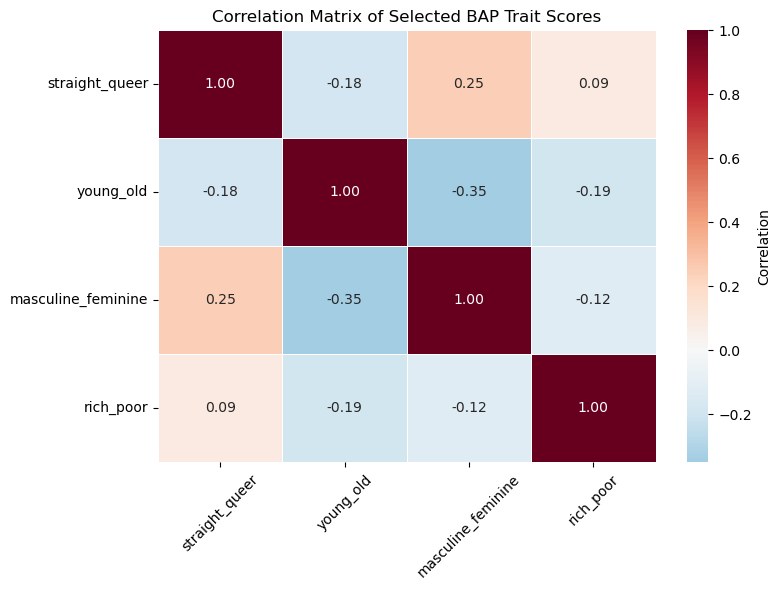

In [7]:
# selected bap features/dimensions of interest
target_dimensions = ["straight_queer", "young_old", "masculine_feminine", "rich_poor"]
corr = char_score_data[target_dimensions].corr().round(2)  # round to 2 decimals

# set up figure
plt.figure(figsize=(8, 6))

# create heatmap with diverging red-blue colors and annotations
sns.heatmap(
    corr,
    annot=True,           # show correlation values
    fmt=".2f",            # 2 decimal places
    cmap="RdBu_r",        # diverging red-blue
    center=0,             # center at 0 for +/- interpretation
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)

# labels and title
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Selected BAP Trait Scores")
plt.tight_layout()

# save plot to visualizations folder
plt.savefig("visualizations/selected_dim_correlation_map.png", dpi=300, bbox_inches="tight")

# show plot
plt.show()

We see that the features are not very strongly (pairwise) correlated with each other. This is good as we don't need to reduce dimensionality.

### Assessing Individual Dimensions
While these dimensions are not strongly (pairwise) correlated with _each other_, they may be correlated with other dimensions in the data set. To start, we can standardize the data (through an array) and then turn it back into a `pandas` dataframe.

In [9]:
data_values = char_score_data.iloc[:, 3:]
scaler = StandardScaler()
data_values = scaler.fit_transform(data_values)
char_scores_scaled_df = pd.DataFrame(data_values)
char_scores_scaled_df.columns = char_score_data.iloc[:, 3:467].columns.to_list()

Next, we create a 500x500 correlation matrix. While this would be a mess to visualize, we can select our target dimensions and see if if they are highly correlated with any other dimensions.

In [10]:
corr_matrix = char_scores_scaled_df.corr().round(2) # create the correlation matrix

target_corrs = {}

for d in target_dimensions:
    top_idx = corr_matrix[d].sort_values(key=abs, ascending=False).head(11).index # find the top 10 correlated dimensions
    numbered_dims = [
        f"{idx} ({corr_matrix[d][top_idx][idx]})" # add their correlation coefficients
        for idx in top_idx
    ]
    
    target_corrs[d] = numbered_dims

target_corrs_df = pd.DataFrame(target_corrs)
target_corrs_df

,straight_queer,young_old,masculine_feminine,rich_poor
0,straight_queer (1.0),young_old (1.0),masculine_feminine (1.0),rich_poor (1.0)
1,androgynous_gendered (-0.71),modern_historical (0.61),macho_metrosexual (0.68),proletariat_bourgeoisie (-0.84)
2,hipster_basic (-0.47),old-fashioned_progressive (-0.6),giggling_chortling (-0.6),blue-collar_ivory-tower (-0.79)
3,macho_metrosexual (0.45),trendy_vintage (0.57),glamorous_spartan (-0.58),oppressed_privileged (-0.72)
4,normal_weird (0.43),beautiful_ugly (0.54),tailor_blacksmith (-0.56),folksy_presidential (-0.68)
5,abstract_concrete (-0.42),vibrant_geriatric (0.52),utilitarian_decorative (0.56),lowbrow_highbrow (-0.67)
6,freak_normie (-0.42),attractive_repulsive (0.51),cat-person_dog-person (-0.53),extravagant_thrifty (0.66)
7,cat-person_dog-person (-0.42),giggling_chortling (0.51),feminist_sexist (-0.53),scruffy_manicured (-0.64)
8,quirky_predictable (-0.42),apprentice_master (0.5),scruffy_manicured (0.49),frugal_lavish (-0.63)
9,autistic_neurotypical (-0.42),liberal_conservative (0.5),kangaroo_dolphin (0.49),eloquent_unpolished (0.63)


By social sciences standards, there are some strong correlations here. For example, `straight_queer` is inversely correlated with `androgynous_gendered`, which suggests that the more queer a character is, the more likely their depiction is androgynous. However, these correlations are not controlling for the influence of other dimensions. We can use the `pingouin` library to calculate the partial correlations, which show us correlations between dimensions while controlling for other dimensions.

In [11]:
pcorr_matrix = char_scores_scaled_df.pcorr().round(2)

target_pcorrs = {}

for d in target_dimensions:
    top_idx = pcorr_matrix[d].sort_values(key=abs, ascending=False).head(11).index
    numbered_dims = [
        f"{idx} ({pcorr_matrix[d][top_idx][idx]})"
        for idx in top_idx
    ]
    
    target_pcorrs[d] = numbered_dims

target_pcorrs_df = pd.DataFrame(target_pcorrs)
target_pcorrs_df

,straight_queer,young_old,masculine_feminine,rich_poor
0,straight_queer (1.0),young_old (1.0),masculine_feminine (1.0),rich_poor (1.0)
1,androgynous_gendered (-0.37),whippersnapper_sage (0.18),feminist_sexist (-0.25),proletariat_bourgeoisie (-0.3)
2,macho_metrosexual (0.13),gamer_non-gamer (0.15),macho_metrosexual (0.22),oppressed_privileged (-0.25)
3,musical_off-key (-0.1),celebrity_boy/girl-next-door (-0.14),giggling_chortling (-0.18),blue-collar_ivory-tower (-0.2)
4,open-minded_close-minded (-0.09),attractive_repulsive (0.14),cat-person_dog-person (-0.18),celebrity_boy/girl-next-door (0.1)
5,modest_flamboyant (0.09),juvenile_mature (0.13),chic_cheesy (-0.13),frugal_lavish (-0.1)
6,cat-person_dog-person (-0.09),vibrant_geriatric (0.12),glamorous_spartan (-0.13),good-cook_bad-cook (0.09)
7,focused-on-the-present_focused-on-the-future (...,slow-talking_fast-talking (-0.11),chivalrous_businesslike (0.12),sickly_healthy (0.09)
8,hugs_handshakes (0.08),rap_rock (0.11),goth_flower-child (0.11),unlucky_fortunate (-0.09)
9,kinky_vanilla (-0.08),modern_historical (0.11),creepy_disarming (-0.11),entrepreneur_employee (0.09)


These coefficients are far less suggestive of strong relationships. However, given how many redundant dimensions we have in the data, this might simply be an issue of too much noise and too unsophisticated of a method. We can revist these questions after doing some dimension reduction in Part 3.